In [1]:
!curl -s https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py > module_update.py

In [12]:
from module_update import update, css
update('nbpictures')
import json
import requests
import nbpictures as nbp
import nbtext as nb
from PIL import Image
from IPython.display import HTML
%matplotlib inline

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\nbpictures.py`

In [13]:
nb.book_urn(author="%zwilgm%", title="%vi%børn%")

[[2016051948119, 'Zwilgmeyer, Dikken', 'Vi børn', 1900],
 [2009060913005, 'Zwilgmeyer, Dikken', 'Vi børn', 1890],
 [2016051948114, 'Zwilgmeyer, Dikken', 'Vi børn', 1893]]

In [23]:
nbp.iiif_manifest("URN:NBN:no-nb_digibok_2009060913005")

{'@context': 'http://iiif.io/api/presentation/2/context.json',
 '@type': 'sc:Manifest',
 '@id': 'https://api.nb.no/catalog/v1/iiif/URN:NBN:no-nb_digibok_2009060913005/manifest{?fields,profile}',
 'label': 'Vi børn',
 'metadata': [{'label': 'Tilgang', 'value': 'Tilgang for alle'},
  {'label': 'Tittel', 'value': 'Vi børn'},
  {'label': 'Forfatter', 'value': 'Zwilgmeyer, Dikken'},
  {'label': 'Omslagsdesigner', 'value': 'Munthe, G..'},
  {'label': 'Publisert', 'value': 'Bergen:Fr. Nygaards forlag, 1890'},
  {'label': 'Andre opplysninger',
   'value': 'Skrevet av Dikken Zwilgmeyer.\nOpplagshistorikk: 2. opl. 1893; 3. opl. 1900; 4. opl. 1910\nElektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2009-09-21\n'},
  {'label': 'Språk', 'value': 'Norsk (Bokmål)'},
  {'label': 'Kilde for metadata',
   'value': 'nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=998440809774702202">998440809774702202</a>)'},
  {'label': 'Omfang', 'value': '112 s.'},
  {'l

In [3]:
css('https://raw.githubusercontent.com/Yoonsen/Modules/master/css_style_sheets/nb_notebook_blue.css')

In [11]:
('vi børn')

[]

### Åpne filen med bildereferanser

Henter alle bildene

In [5]:
with open("sofies_illustrations.json") as fp:
    illus = json.load(fp)

len(illus)

FileNotFoundError: [Errno 2] No such file or directory: 'sofies_illustrations.json'

In [7]:
illus = json

## Kode for å finne bilder og manipulere dem

In [21]:
small_scale = 0.59
large_scale = 1.58

def iiif_manifest(urn):
    r = requests.get("https://api.nb.no/catalog/v1/iiif/{urn}/manifest".format(urn=urn))
    return r.json()


    
def load_picture(url):
    r = requests.get(url, stream=True)
    r.raw.decode_content=True
    #print(r.status_code)
    return r.raw

def metadata(ill):
    #print(ill)
    u = bookurn_from_illustration(get_url_from_illustration(ill, part=100))
    m = iiif_manifest(u)['metadata']
    return m

def meta2html(ill):
    d = metadata(ill)
    ls = ""
    for i in d:
        ls += "<dt>{label}</dt><dd>{value}</dd>".format(label=i['label'], value=i['value'])
    return "<dl>{ls}</dl>".format(ls=ls)

def bookurn_from_illustration(ill):
    import re
    #print(ill)
    hits = re.findall("URN[^/]+", ill)
    if hits != []:
        res = hits[0].split('_')[:-1]
        res = '_'.join(res)
    return res

def get_url_from_illustration(illus, part = 200, scale = small_scale):
    urn = "URN:NBN:no-nb_" + illus['page']
    #print(urn)
    if part == True:
        # return cut out
        url = "https://www.nb.no/services/image/resolver/{urn}/{hpos},{vpos},{width},{height}/full/0/native.jpg".format(
            urn = urn, 
            width = int(int(illus['width'])*scale), 
            height = int(int(illus['height'])*scale), 
            vpos = int(int(illus['vpos'])*scale), 
            hpos = int(int(illus['hpos'])*scale)
        )
    else:
        # return whole page
        url = "https://www.nb.no/services/image/resolver/{urn}/full/0,{part}/0/native.jpg".format( part=part,
                urn = urn, width=illus['width'], height= illus['height'], vpos=illus['vpos'], hpos=illus['hpos'])
    
    return url

def get_picture_from_illustration(illus, page=True, scale=small_scale):
    if page == True:
        url = get_url_from_illustration(illus, part=500)
    else:
        url = get_url_from_illustration(illus, part = True, scale=scale)
    return Image.open(load_picture(url))

def display_finds(r):
    """A list of urls in r is displayed as HTML"""
    rows = ["<tr><td><img src='{row}'</td><td>{meta}</td></tr>".format(row=row, meta=row) for row in r]
    return HTML("""<html><head></head>
     <body>
     <table>
     {rows}
     </table>
     </body>
     </html>
     """.format(rows=' '.join(rows)))

def show_illustrations(illustrations = illus, fra = 0, til = 100):
    ill = illustrations
    urls = [
        (
            get_url_from_illustration(ill[i], part=800),
            get_url_from_illustration(ill[i], part=True, scale = small_scale), # try cutout 1
            get_url_from_illustration(ill[i], part=True, scale = large_scale), # try cutout 2
            i,
            ill[i]
        )
        for i in range(fra, til)
    ]
    """A list of urls in r is displayed as HTML"""
    rows = [
        """<tr>
        <td>
            <img src='{row}' >
        </td>
        <td>
            index {index}
        </td>
        <td>
            <img src='{r2}' >
        </td>
        <td>
            <img src='{r3}' >
        </td>
        
        <td>
            {meta}
        </td>
        </tr>""".format(
        row = row[0], r2 = row[1], r3 = row[2], index = row[3], meta=meta2html(row[4])) for row in urls]
    return HTML("""<html><head></head>
     <body>
     <table>
     {rows}
     </table>
     </body>
     </html>
     """.format(rows=' '.join(rows)))


# Se på metadata for bildene

Illustrasjonene ligger i variabelen `illus`, det er en array av info

In [18]:
illus[236]

{'type': 'Illustration',
 'vpos': '15',
 'hpos': '66',
 'page': 'digibok_2010042106089_0184',
 'width': '2433',
 'height': '333'}

Informasjon om en bok i listen (arrayet). En liste med informasjonsbiter. 

In [21]:
metadata(illus[236])

[{'label': 'Tilgang', 'value': 'Tilgang for alle'},
 {'label': 'Tittel', 'value': 'Snorre Sturlesons norske Kongers Sagaer. B. 2'},
 {'label': 'Forfatter', 'value': 'Snorri Sturluson'},
 {'label': 'Oversetter', 'value': 'Aall, Jacob'},
 {'label': 'Publisert', 'value': 'Christiania:Guldberg & Dzwonkowski, 1839'},
 {'label': 'Emne',
  'value': 'Sagaer | Konger | Norge | norrøn | litteratur | sagaer | kongesagaer'},
 {'label': 'Andre opplysninger',
  'value': 'Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-05-27\n'},
 {'label': 'Språk', 'value': 'Norsk (Bokmål)'},
 {'label': 'Kilde for metadata',
  'value': 'nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=990014435264702202">990014435264702202</a>)'},
 {'label': 'Omfang', 'value': '228 s.'},
 {'label': 'Medietype', 'value': 'bøker'},
 {'label': 'UDC', 'value': '948.1(093), 839.5, 839.59'},
 {'label': 'Varig lenke',
  'value': '<a href="https://urn.nb.no/URN:NBN:no-nb_digibok_201004

Listen over kan også vises som html, som gjøre det hele litt mer leselig. Kommandoen `meta2html` genererer en html-liste, og kommandoen `HTML` fra Python, viser den frem som HTML. Her kobles de sammen. Alle metadataene kan i prinsippet lastes ned og gjøres søkbare. 

In [22]:
HTML(meta2html(illus[236]))

In [ ]:
all_meta = []

# Se på alle bildene, enten som utsnitt eller som hele sider

Kommandoen er `show_illustrations(fra = start, til = slutt)`. Sikkert lurt å lage kopier av notebooken og ta ut en 500 til 1000 bilder i gangen. Det gir ca. ti notebøker, hver med sin batch. Bildene lastes ned i full størrelse, så de tar litt plass.

Bildene lages i to varianter, en med liten verdi for skalering (ca. 0.6) og en med høy verdi for skalering (ca. 1.6). Det ser ut til at alle bildene blir riktig med en av de verdiene. Når et bilde velges, bør det tas med hvilken skalering som er den riktige.

I tabellen under er det 5 kolonner.


1. første kolonnne er boksiden
1. andre kolonne er indeksen til `illus`.
1. tredje kolonne er utsnitt tatt med liten skalering
1. fjerde kolonne er utsnitt med høy skalering
1. femte er metadata, IIIF-manifestet for boka.


In [130]:
show_illustrations(fra = 0, til= 5)

,index 0,,,"TilgangTilgang for alleTittelGaader med hosføiet OpløsningForfatterWinsnes, HannaPublisertChristiania:Malling, 1845Andre opplysningerElektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-03-15 SpråkNorsk (Bokmål)Kilde for metadatanb.bibsys.no (990305403304702202)Omfang44 s.MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2009111310002"
,index 1,,,"TilgangTilgang for alleTittelGaader med hosføiet OpløsningForfatterWinsnes, HannaPublisertChristiania:Malling, 1845Andre opplysningerElektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-03-15 SpråkNorsk (Bokmål)Kilde for metadatanb.bibsys.no (990305403304702202)Omfang44 s.MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2009111310002"
,index 2,,,"TilgangTilgang for alleTittelGaader med hosføiet OpløsningForfatterWinsnes, HannaPublisertChristiania:Malling, 1845Andre opplysningerElektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-03-15 SpråkNorsk (Bokmål)Kilde for metadatanb.bibsys.no (990305403304702202)Omfang44 s.MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2009111310002"
,index 3,,,"TilgangTilgang for alleTittelGaader med hosføiet OpløsningForfatterWinsnes, HannaPublisertChristiania:Malling, 1845Andre opplysningerElektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-03-15 SpråkNorsk (Bokmål)Kilde for metadatanb.bibsys.no (990305403304702202)Omfang44 s.MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2009111310002"
,index 4,,,"TilgangTilgang for alleTittelFagrskinna : kortfattet norsk Konge-Saga fra slutningen af det tolfte eller begyndelsen af det trettende AarhundredeMedforfatter/BidragsyterUnger, C.R. | Munch, P.A. | Malling, Peter TidemandPublisertTrykt hos P. T. Malling, 1847EmneMiddelalder | middelalder | norge | sagaer | sagaerAndre opplysningerMed forord på norsk Formatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 41 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2015-07-22 SpråkNorsk (Gammelnorsk)Kilde for metadatanb.bibsys.no (990016977814702202)OmfangXVI, 216 s., pl. 8°MedietypebøkerUDC948.1(093), 948.1.02(093), 839.51, 839.5Varig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2015043007594"


In [132]:
show_illustrations(fra = 4000, til= 4050)

,index 4000,,,"TilgangTilgang for alleTittelNyeste billed-ABC for Begyndere i Læsning. Med 30 AfbildningerUtgiverGuldberg & Dzwonkowskis ForlagMedforfatter/BidragsyterMalling, Peter TidemandPublisertTrykt i Forlæggerens Officin af P.T. MallingAndre opplysningerFormatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 20 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-09-01 SpråkDanskKilde for metadatanb.bibsys.no (990940450894702202)Omfang48 s. ill. 13 cm (16°)MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2017081626006"
,index 4001,,,"TilgangTilgang for alleTittelNyeste billed-ABC for Begyndere i Læsning. Med 30 AfbildningerUtgiverGuldberg & Dzwonkowskis ForlagMedforfatter/BidragsyterMalling, Peter TidemandPublisertTrykt i Forlæggerens Officin af P.T. MallingAndre opplysningerFormatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 20 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-09-01 SpråkDanskKilde for metadatanb.bibsys.no (990940450894702202)Omfang48 s. ill. 13 cm (16°)MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2017081626006"
,index 4002,,,"TilgangTilgang for alleTittelNyeste billed-ABC for Begyndere i Læsning. Med 30 AfbildningerUtgiverGuldberg & Dzwonkowskis ForlagMedforfatter/BidragsyterMalling, Peter TidemandPublisertTrykt i Forlæggerens Officin af P.T. MallingAndre opplysningerFormatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 20 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-09-01 SpråkDanskKilde for metadatanb.bibsys.no (990940450894702202)Omfang48 s. ill. 13 cm (16°)MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2017081626006"
,index 4003,,,"TilgangTilgang for alleTittelNyeste billed-ABC for Begyndere i Læsning. Med 30 AfbildningerUtgiverGuldberg & Dzwonkowskis ForlagMedforfatter/BidragsyterMalling, Peter TidemandPublisertTrykt i Forlæggerens Officin af P.T. MallingAndre opplysningerFormatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 20 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-09-01 SpråkDanskKilde for metadatanb.bibsys.no (990940450894702202)Omfang48 s. ill. 13 cm (16°)MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2017081626006"
,index 4004,,,"TilgangTilgang for alleTittelNyeste billed-ABC for Begyndere i Læsning. Med 30 AfbildningerUtgiverGuldberg & Dzwonkowskis ForlagMedforfatter/BidragsyterMalling, Peter TidemandPublisertTrykt i Forlæggerens Officin af P.T. MallingAndre opplysningerFormatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 20 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-09-01 SpråkDanskKilde for metadatanb.bibsys.no (990940450894702202)Omfang48 s. ill. 13 cm (16°)MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2017081626006"
,index 4005,,,"TilgangTilgang for alleTittelNyeste billed-ABC for Begyndere i Læsning. Med 30 AfbildningerUtgiverGuldberg & Dzwonkowskis ForlagMedforfatter/BidragsyterMalling, Peter TidemandPublisertTrykt i Forlæggerens Officin af P.T. MallingAndre opplysningerFormatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 20 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-09-01 SpråkDanskKilde for metadatanb.bibsys.no (990940450894702202)Omfang48 s. ill. 13 cm (16°)MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2017081626006"
,index 4006,,,"TilgangTilgang for alleTittelNyeste billed-ABC for Begyndere i Læsning. Med 30 AfbildningerUtgiverGuldberg & Dzwonkowskis ForlagMedforfatter/BidragsyterMalling, Peter TidemandPublisertTrykt i Forlæggerens Officin af P.T. MallingAndre opplysningerFormatangivelse etter Norsk Bog-Fortegnelse 1814-1847, s. 20 Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-09-01 SpråkDanskKilde for metadatanb.bibsys.no (990940450894702202)Omfang48 s. ill. 13 cm (16°)MedietypebøkerVarig lenkehttps://urn.nb.no/URN:NBN:no-nb_digibok_2017081626006"
,index 4007,,,"TilgangTilgang for alleTittelNyeste billed-A

## Se på enkeltbilder

Kommandoen for enkeltbilder er `get_picture_from_illustration` som tar tre parameter. Det første er illustrasjonsdata, det som ligger i variabelen `illus`, deretter er det parameteret `page` som ved å settes lik `True` gir hele boksiden, og om den settes `False` (default) gir illustrasjonen som refereres til fra `illus`. Det tredje og siste parameteret er skaleringen, `scale`, som kan settes til hva som helst, men variablene `small_scale` og `large_scale` er tilgjengelige. Se eksemplene nedenfor. 

Husk at hvert bilde er identifisert fra `illus` med et tall mellom 0 og 5015, så illustrasjon 100 er `illus[99]`.

**Hele siden**

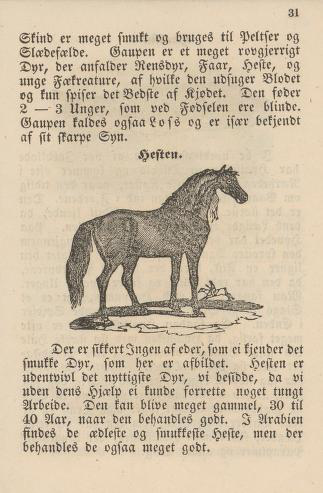

In [36]:
get_picture_from_illustration(illus[4002], page= True)

**bare utsnittet**

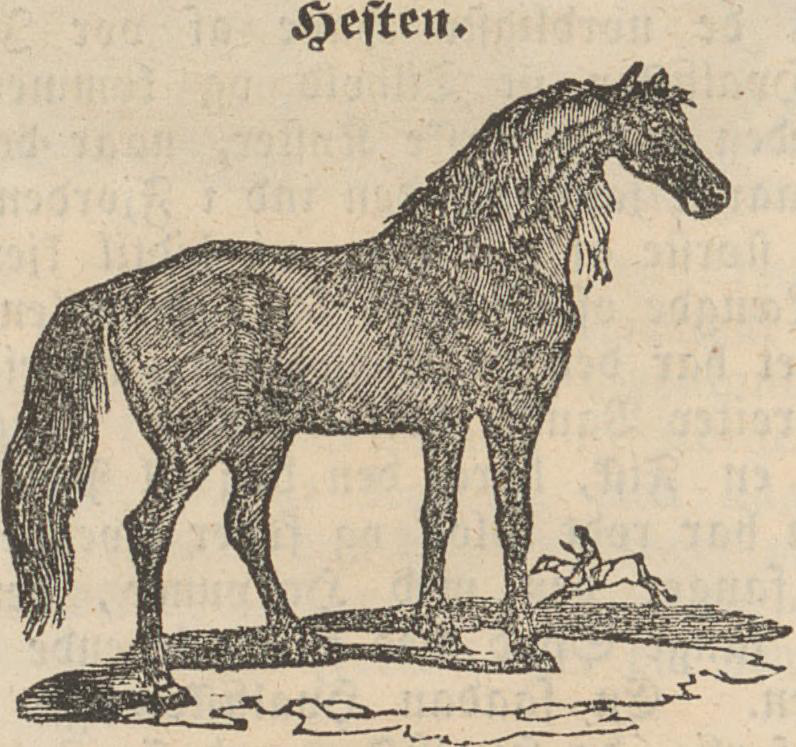

In [53]:
# For det her bildet må vi benytte large_scale

get_picture_from_illustration(illus[4002], page= False, scale = large_scale)

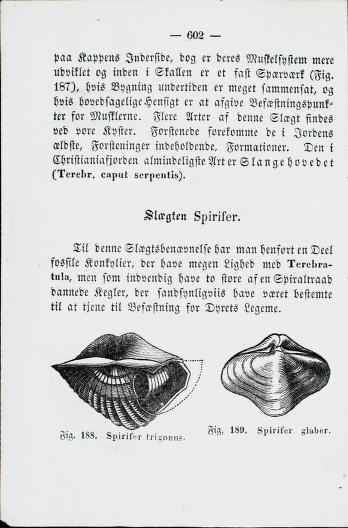

In [55]:
get_picture_from_illustration(illus[2646], page= True)

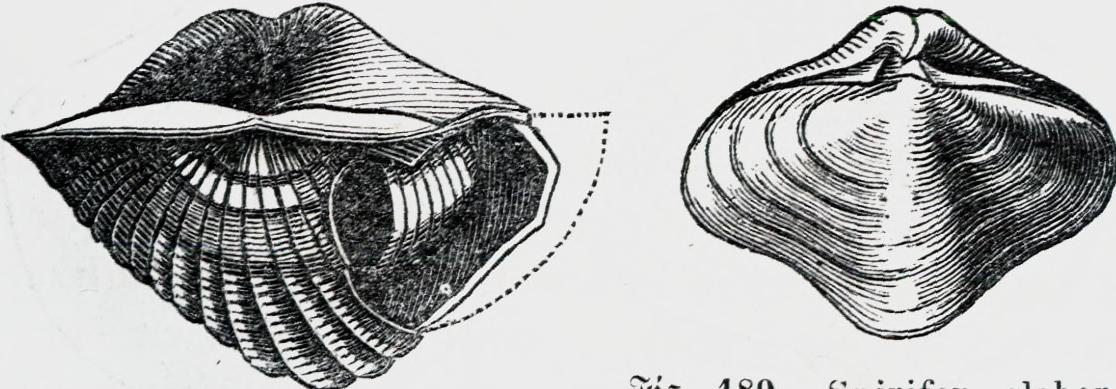

In [56]:
get_picture_from_illustration(illus[2646], page= False, scale = small_scale)


# Lagring til fil

Om du vil lagre et bilde på disken for å gjøre noe med det. Kan du bare bruke kommandoene over, den som viser bildet. Her er oppskriften.

Bildet av hesten, som ble laget med kommandoen `get_picture_from_illustration(illus[4002], page= False, scale = large_scale)` kan brukes for å lagre. Send bildet til en variabel, for eksempel `p`, og bruk `p.save(filnavn)` for å lagre til disk.

In [54]:
# Hent bildet og legg det i p
p = get_picture_from_illustration(illus[4002], page= False, scale = large_scale)

# Lagre bildet fra p
# Her har jeg satt ekstensjon til .jpg så den lagres som det, du kan også bruke .png, eller andre formater.
p.save("horse.jpg")